In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

data = pd.read_csv('../ssd_data/lstm_data/final_data_MA1.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by=['ds'])
data = data.drop_duplicates(subset=['disk_id', 'ds'])
data.reset_index(inplace=True)
del(data['index'])
data

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
0,28267,2019-01-01,4.294967e+09,95.0,0.0,46339.0,41.0,100.0,0.0,100.0,...,14.0,2.202509e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.159917e+12,0
1,1674,2019-01-01,4.294967e+09,96.0,0.0,9021.0,-1.0,-1.0,-1.0,-1.0,...,14.0,-1.000000e+00,100.0,0.0,-1.0,-1.0,-1.0,100.0,2.323887e+11,0
2,3160,2019-01-01,4.294967e+09,98.0,0.0,40273.0,29.0,100.0,0.0,100.0,...,13.0,1.100210e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.027004e+12,0
3,11918,2019-01-01,4.294967e+09,97.0,0.0,38090.0,-1.0,-1.0,-1.0,-1.0,...,12.0,-1.000000e+00,100.0,0.0,-1.0,-1.0,-1.0,100.0,9.582576e+11,0
4,12036,2019-01-01,4.294967e+09,97.0,1.0,38317.0,-1.0,-1.0,-1.0,-1.0,...,19.0,-1.000000e+00,99.0,1.0,-1.0,-1.0,-1.0,100.0,9.664309e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75164,1664,2019-06-30,4.294967e+09,97.0,0.0,23299.0,-1.0,-1.0,-1.0,-1.0,...,15.0,-1.000000e+00,100.0,0.0,-1.0,-1.0,-1.0,100.0,5.970077e+11,0
75165,10533,2019-06-30,4.294967e+09,94.0,0.0,50860.0,33.0,100.0,0.0,100.0,...,15.0,1.333815e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.288904e+12,0
75166,13332,2019-06-30,4.294967e+09,97.0,0.0,42594.0,-1.0,-1.0,-1.0,-1.0,...,15.0,-1.000000e+00,100.0,0.0,-1.0,-1.0,-1.0,100.0,1.082661e+12,0
75167,6924,2019-06-30,4.294967e+09,94.0,0.0,50024.0,43.0,100.0,0.0,100.0,...,15.0,8.036993e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.258629e+12,0


In [8]:
label_1 = data[data['label']==1]
label_1=label_1.drop(columns=['disk_id','ds','label'])
label_1

,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,...,r_190,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175
476,4.294967e+09,98.0,2.0,40175.0,28.0,100.0,4.0,100.0,0.0,1.0,...,20.0,20.0,1.067805e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.018337e+12
486,4.294967e+09,98.0,0.0,40012.0,59.0,100.0,0.0,100.0,0.0,1.0,...,16.0,16.0,2.260676e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.005077e+12
1336,4.294967e+09,98.0,0.0,36922.0,30.0,100.0,0.0,100.0,0.0,1.0,...,18.0,18.0,1.591232e+09,100.0,0.0,0.0,0.0,0.0,100.0,9.407059e+11
1342,4.294967e+09,98.0,0.0,36522.0,28.0,100.0,0.0,100.0,0.0,83.0,...,14.0,14.0,2.791970e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.280304e+11
1403,4.294967e+09,94.0,141.0,37481.0,30.0,99.0,70.0,100.0,0.0,1.0,...,8.0,8.0,2.748596e+09,97.0,141.0,0.0,0.0,0.0,100.0,9.497040e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64872,4.294967e+09,96.0,0.0,44625.0,36.0,100.0,0.0,100.0,0.0,97.0,...,15.0,15.0,1.270160e+06,100.0,0.0,0.0,0.0,0.0,1.0,1.134050e+12
65353,4.294967e+09,98.0,0.0,44244.0,27.0,100.0,0.0,100.0,0.0,1.0,...,19.0,19.0,2.581993e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125316e+12
65429,4.294967e+09,98.0,0.0,40585.0,28.0,100.0,0.0,100.0,0.0,1.0,...,15.0,15.0,1.579518e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.035432e+12
65911,4.294967e+09,98.0,0.0,42078.0,44.0,100.0,0.0,100.0,0.0,1.0,...,17.0,17.0,3.873290e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.057160e+12


In [9]:
#Scaling 과정
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(label_1)
label_1_scaled = scaler.transform(label_1)

c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

Text(0.5, 1.0, 'K-Means Inertia')

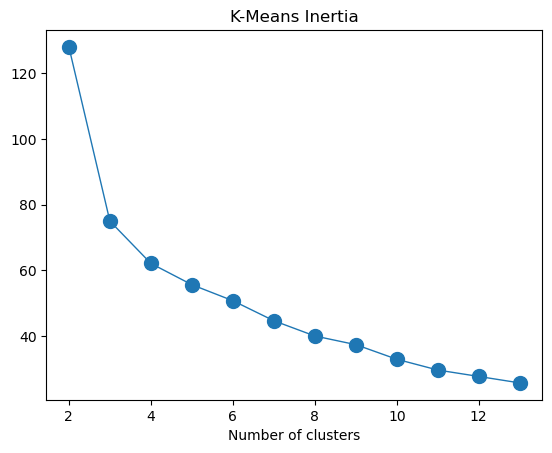

In [14]:
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
'''StandardSclaer를 사용하여 진행''' 

inertia=[]
kmeans_sil_scores=[]
for n_cluster in range(2,14):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(label_1_scaled)

    inertia.append(kmeans.inertia_)
    kmeans_sil_scores.append(silhouette_score(label_1_scaled, cluster_labels))

plt.plot(range(2,14),inertia,marker='o', lw=1,ms=10) 
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")
# clusters = 3일때, 꺽이는 지점인것을 알 수 있음

Text(0.5, 1.0, 'Silhouette Score')

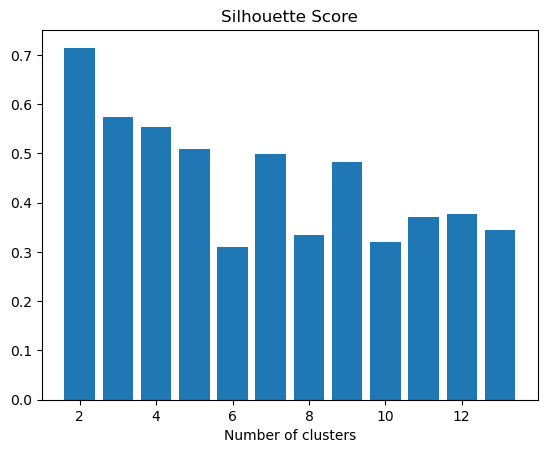

In [15]:
plt.bar(range(2,14),kmeans_sil_scores,)
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")
# clusters =3 일때, silhouette score가 가장 높은것을 알 수 있음.

In [125]:
n_cluster=3
best_kmeans = KMeans(n_clusters=n_cluster,random_state=0)
cluster_labels=best_kmeans.fit_predict(label_1_scaled)
best_kmeans_sil_score=silhouette_score(label_1_scaled,cluster_labels)

print('Best kmeans clustering silhouette score:',best_kmeans_sil_score)

Best kmeans clustering silhouette score: 0.5736346256998316


c:\Users\choib\anaconda3\envs\iise-python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [126]:
label_1['cluster']=cluster_labels
label_1

,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,cluster
476,4.294967e+09,98.0,2.0,40175.0,28.0,100.0,4.0,100.0,0.0,1.0,...,20.0,1.067805e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.018337e+12,1
486,4.294967e+09,98.0,0.0,40012.0,59.0,100.0,0.0,100.0,0.0,1.0,...,16.0,2.260676e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.005077e+12,1
1336,4.294967e+09,98.0,0.0,36922.0,30.0,100.0,0.0,100.0,0.0,1.0,...,18.0,1.591232e+09,100.0,0.0,0.0,0.0,0.0,100.0,9.407059e+11,1
1342,4.294967e+09,98.0,0.0,36522.0,28.0,100.0,0.0,100.0,0.0,83.0,...,14.0,2.791970e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.280304e+11,1
1403,4.294967e+09,94.0,141.0,37481.0,30.0,99.0,70.0,100.0,0.0,1.0,...,8.0,2.748596e+09,97.0,141.0,0.0,0.0,0.0,100.0,9.497040e+11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64872,4.294967e+09,96.0,0.0,44625.0,36.0,100.0,0.0,100.0,0.0,97.0,...,15.0,1.270160e+06,100.0,0.0,0.0,0.0,0.0,1.0,1.134050e+12,2
65353,4.294967e+09,98.0,0.0,44244.0,27.0,100.0,0.0,100.0,0.0,1.0,...,19.0,2.581993e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125316e+12,1
65429,4.294967e+09,98.0,0.0,40585.0,28.0,100.0,0.0,100.0,0.0,1.0,...,15.0,1.579518e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.035432e+12,1
65911,4.294967e+09,98.0,0.0,42078.0,44.0,100.0,0.0,100.0,0.0,1.0,...,17.0,3.873290e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.057160e+12,1


In [91]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(label_1)
label_1_pca = pca.transform(label_1)

In [92]:
# dim reduction with tsne
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method. not be used as preprocessing step of supervised learning
label_1_tsne = tsne.fit_transform(label_1)

Text(0, 0.5, 'Second principal component')

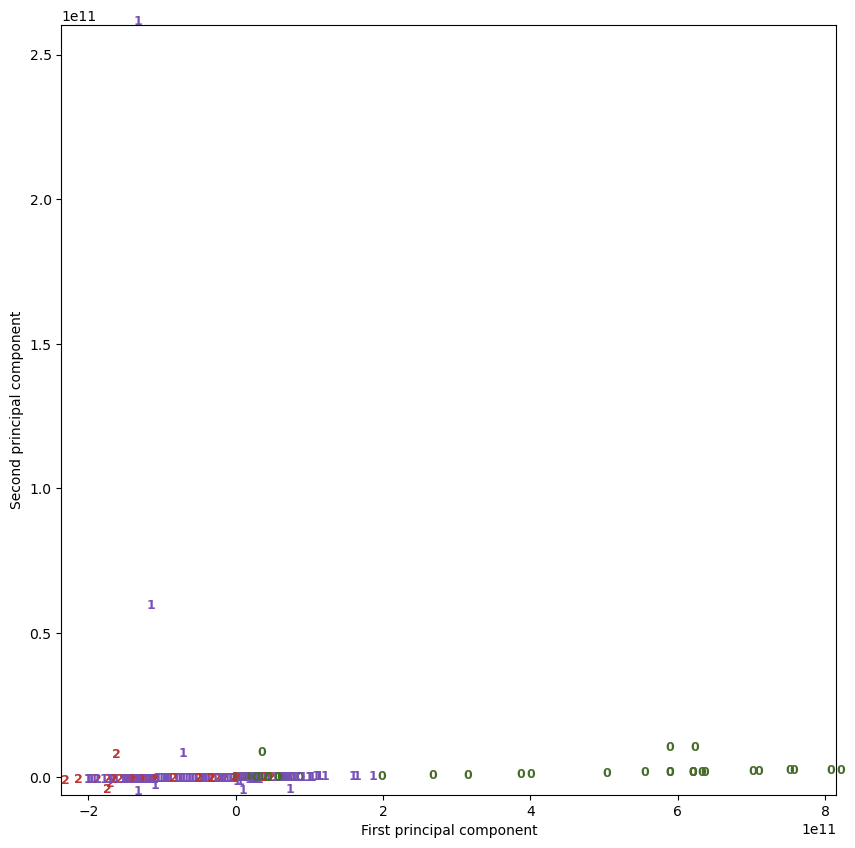

In [127]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_pca[:, 0].min(), label_1_pca[:, 0].max())
plt.ylim(label_1_pca[:, 1].min(), label_1_pca[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_pca[i, 0], label_1_pca[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#중복되는 경우 많음. 난잡하게 섞여있다.

Text(0, 0.5, 'Second principal component')

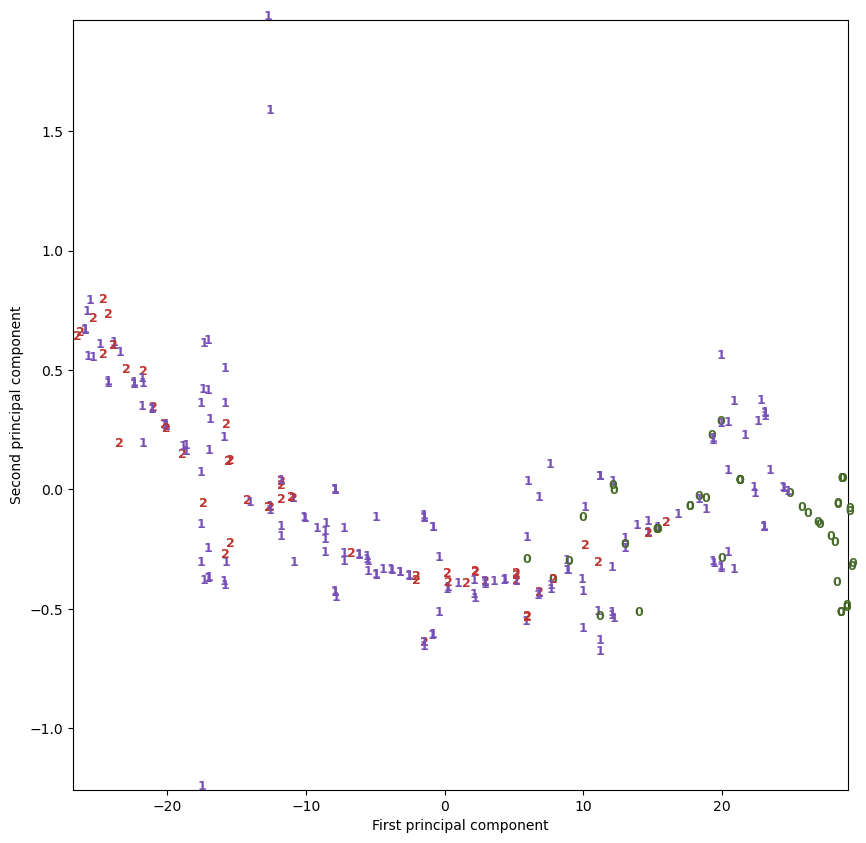

In [128]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_tsne[:, 0].min(), label_1_tsne[:, 0].max())
plt.ylim(label_1_tsne[:, 1].min(), label_1_tsne[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_tsne[i, 0], label_1_tsne[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#상대적으로 잘 뭉쳐져있다! -> 시각화하는데 잘 사용됨.

## Clustering Algorithm(2)- Agglomerative Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering

agg_sil_scores=[]
#ward,complete,average,single -> 선택
linkages = ['ward','complete','average','single']
for linkage in linkages:
    linkage_sil_scores =[]
    for n_cluster in range(2,14):
        agg = AgglomerativeClustering(n_clusters=n_cluster,linkage=linkage)
        agg.fit(label_1_scaled)
        cluster_labels=agg.labels_
        linkage_sil_scores.append(silhouette_score(label_1_scaled,cluster_labels))
    agg_sil_scores.append(linkage_sil_scores)


In [18]:
agg_sil_scores=np.stack(agg_sil_scores)
for i in range(4):
    print('{}의 최대 silhouette score :{}'.format(linkages[i],agg_sil_scores[i].max()))
#ward의 silhouette score가 가장 높음 -> ward를 선택

ward의 최대 silhouette score :0.7144534943579282
complete의 최대 silhouette score :0.7144534943579282
average의 최대 silhouette score :0.7144534943579282
single의 최대 silhouette score :0.7144534943579282


Text(0.5, 1.0, 'Silhouette Score')

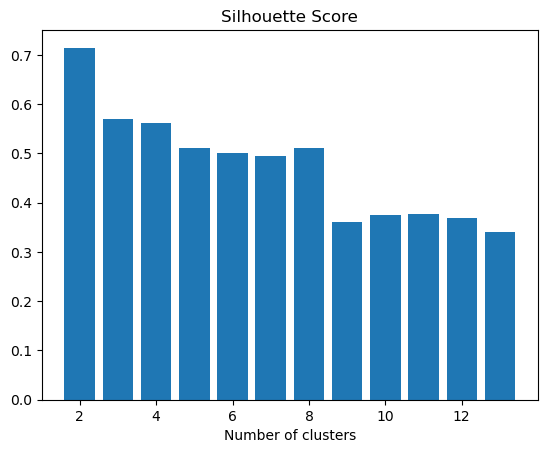

In [19]:
plt.bar(range(2,14),agg_sil_scores[0],)
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

In [119]:
n_cluster = 4
linkage='ward'
best_agg = AgglomerativeClustering(n_clusters=n_cluster,linkage=linkage)
best_agg.fit(label_1_scaled)
best_agg_sil_score=silhouette_score(label_1_scaled,best_agg.labels_)
print('Best agglomerative clustering silhouette score:',best_agg_sil_score)

Best agglomerative clustering silhouette score: 0.5614282875044544


In [129]:
cluster_labels=best_agg.fit_predict(label_1_scaled)

In [130]:
label_1['cluster']=cluster_labels
label_1

,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,cluster
476,4.294967e+09,98.0,2.0,40175.0,28.0,100.0,4.0,100.0,0.0,1.0,...,20.0,1.067805e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.018337e+12,3
486,4.294967e+09,98.0,0.0,40012.0,59.0,100.0,0.0,100.0,0.0,1.0,...,16.0,2.260676e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.005077e+12,3
1336,4.294967e+09,98.0,0.0,36922.0,30.0,100.0,0.0,100.0,0.0,1.0,...,18.0,1.591232e+09,100.0,0.0,0.0,0.0,0.0,100.0,9.407059e+11,3
1342,4.294967e+09,98.0,0.0,36522.0,28.0,100.0,0.0,100.0,0.0,83.0,...,14.0,2.791970e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.280304e+11,1
1403,4.294967e+09,94.0,141.0,37481.0,30.0,99.0,70.0,100.0,0.0,1.0,...,8.0,2.748596e+09,97.0,141.0,0.0,0.0,0.0,100.0,9.497040e+11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64872,4.294967e+09,96.0,0.0,44625.0,36.0,100.0,0.0,100.0,0.0,97.0,...,15.0,1.270160e+06,100.0,0.0,0.0,0.0,0.0,1.0,1.134050e+12,2
65353,4.294967e+09,98.0,0.0,44244.0,27.0,100.0,0.0,100.0,0.0,1.0,...,19.0,2.581993e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125316e+12,3
65429,4.294967e+09,98.0,0.0,40585.0,28.0,100.0,0.0,100.0,0.0,1.0,...,15.0,1.579518e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.035432e+12,3
65911,4.294967e+09,98.0,0.0,42078.0,44.0,100.0,0.0,100.0,0.0,1.0,...,17.0,3.873290e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.057160e+12,3


In [131]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(label_1)
label_1_pca = pca.transform(label_1)

In [132]:
# dim reduction with tsne
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method. not be used as preprocessing step of supervised learning
label_1_tsne = tsne.fit_transform(label_1)

Text(0, 0.5, 'Second principal component')

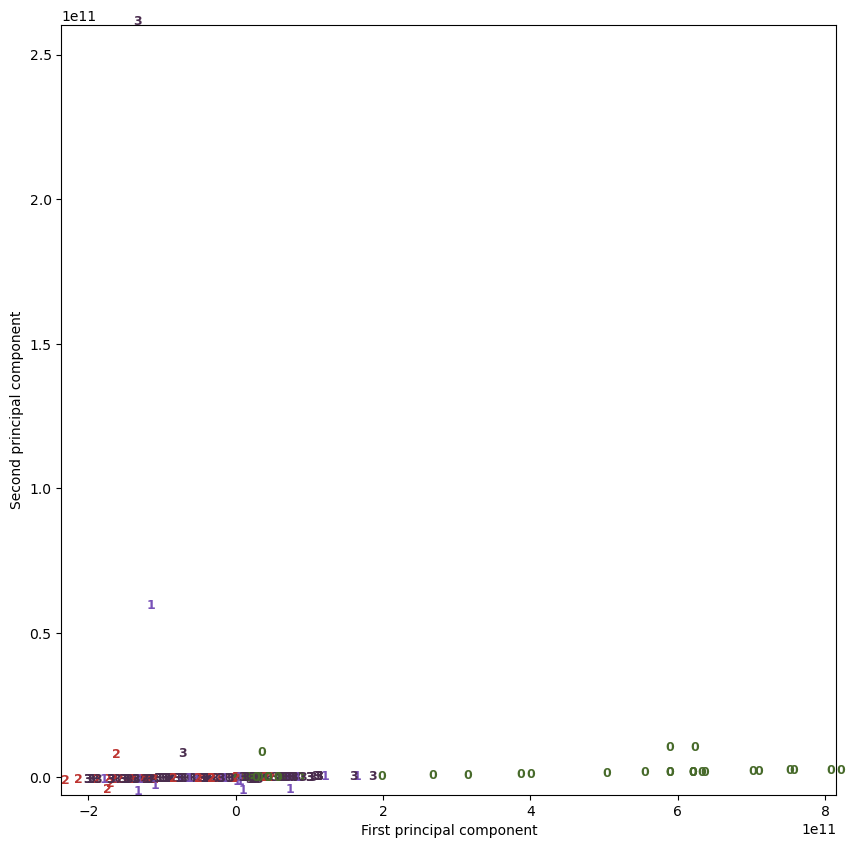

In [133]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_pca[:, 0].min(), label_1_pca[:, 0].max())
plt.ylim(label_1_pca[:, 1].min(), label_1_pca[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_pca[i, 0], label_1_pca[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#중복되는 경우 많음. 난잡하게 섞여있다.

Text(0, 0.5, 'Second principal component')

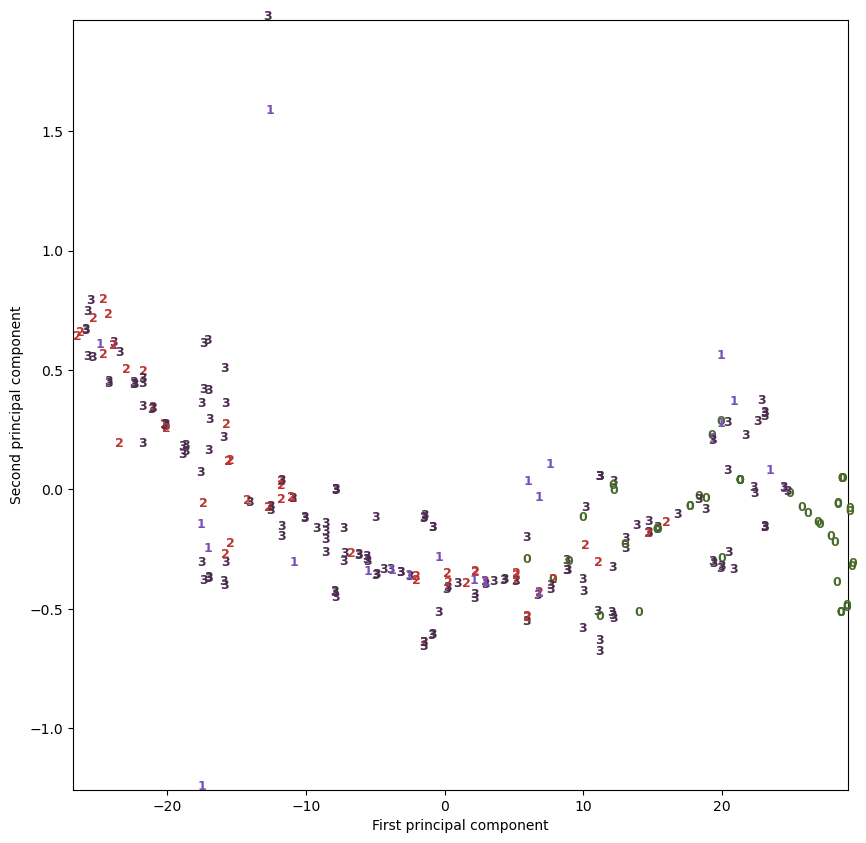

In [134]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_tsne[:, 0].min(), label_1_tsne[:, 0].max())
plt.ylim(label_1_tsne[:, 1].min(), label_1_tsne[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_tsne[i, 0], label_1_tsne[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#상대적으로 잘 뭉쳐져있다! -> 시각화하는데 잘 사용됨.

## Clustering Algorithm(3) - DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

eps_list=[1,1.5,1.8,2,2.5]
min_samples=[2,3,4,5,6,7]

dbscan_sil_scores =[]

for eps in eps_list:
    dbscan_sil=[]
    for ms in min_samples:
        dbscan = DBSCAN(eps=eps,min_samples=ms)
        dbscan.fit(label_1_scaled)
        cluster_labels = dbscan.labels_
        dbscan_sil.append(silhouette_score(label_1_scaled,cluster_labels))
    dbscan_sil_scores.append(dbscan_sil)

dbscan_sil_scores=np.stack(dbscan_sil_scores)
dbscan_sil_scores

array([[0.55245542, 0.55245542, 0.56064012, 0.56064012, 0.56064012,
        0.56064012],
       [0.68014128, 0.68014128, 0.68014128, 0.68014128, 0.68014128,
        0.68014128],
       [0.68014128, 0.68014128, 0.68014128, 0.68014128, 0.68014128,
        0.68014128],
       [0.71445349, 0.71445349, 0.71445349, 0.71445349, 0.71445349,
        0.71445349],
       [0.71445349, 0.71445349, 0.71445349, 0.71445349, 0.71445349,
        0.71445349]])

In [40]:
max_scores=[]
for i in range(len(eps_list)):
    max_scores.append(dbscan_sil_scores[i].max())
max_index=max_scores.index(max(max_scores))

print('silhouette score의 최대:',max_scores[max_index])
print('silhouette score가 최대일때, eps:',eps_list[max_index])

silhouette score의 최대: 0.7144534943579282
silhouette score가 최대일때, eps: 2


In [115]:
best_dbscan=DBSCAN(eps=1,min_samples=3)
best_dbscan.fit(label_1_scaled)
best_dbscan_sil_score=silhouette_score(label_1_scaled,best_dbscan.labels_)
print('Best DBSCAN clustering silhouette score:',best_dbscan_sil_score)

Best DBSCAN clustering silhouette score: 0.5524554163930689


In [116]:
label_1['cluster']=best_dbscan.fit_predict(label_1_scaled)
label_1

,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,cluster
476,4.294967e+09,98.0,2.0,40175.0,28.0,100.0,4.0,100.0,0.0,1.0,...,20.0,1.067805e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.018337e+12,0
486,4.294967e+09,98.0,0.0,40012.0,59.0,100.0,0.0,100.0,0.0,1.0,...,16.0,2.260676e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.005077e+12,0
1336,4.294967e+09,98.0,0.0,36922.0,30.0,100.0,0.0,100.0,0.0,1.0,...,18.0,1.591232e+09,100.0,0.0,0.0,0.0,0.0,100.0,9.407059e+11,0
1342,4.294967e+09,98.0,0.0,36522.0,28.0,100.0,0.0,100.0,0.0,83.0,...,14.0,2.791970e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.280304e+11,0
1403,4.294967e+09,94.0,141.0,37481.0,30.0,99.0,70.0,100.0,0.0,1.0,...,8.0,2.748596e+09,97.0,141.0,0.0,0.0,0.0,100.0,9.497040e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64872,4.294967e+09,96.0,0.0,44625.0,36.0,100.0,0.0,100.0,0.0,97.0,...,15.0,1.270160e+06,100.0,0.0,0.0,0.0,0.0,1.0,1.134050e+12,1
65353,4.294967e+09,98.0,0.0,44244.0,27.0,100.0,0.0,100.0,0.0,1.0,...,19.0,2.581993e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125316e+12,0
65429,4.294967e+09,98.0,0.0,40585.0,28.0,100.0,0.0,100.0,0.0,1.0,...,15.0,1.579518e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.035432e+12,0
65911,4.294967e+09,98.0,0.0,42078.0,44.0,100.0,0.0,100.0,0.0,1.0,...,17.0,3.873290e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.057160e+12,0


In [105]:
label_1['cluster'].value_counts()

 0    179
 1     49
 2     43
 3      3
-1      1
Name: cluster, dtype: int64

<BarContainer object of 3 artists>

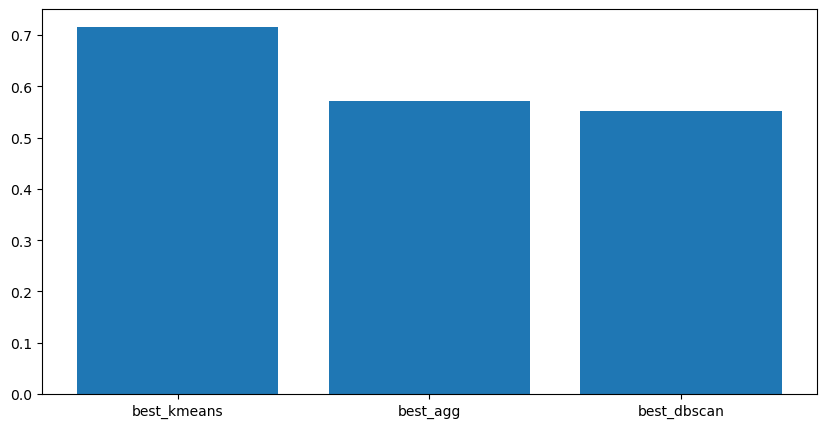

In [106]:
clusterings_sil_scores = [best_kmeans_sil_score,best_agg_sil_score,best_dbscan_sil_score]
cluster_names = ['best_kmeans','best_agg','best_dbscan']
plt.figure(figsize=(10,5))
plt.bar(cluster_names,clusterings_sil_scores,)

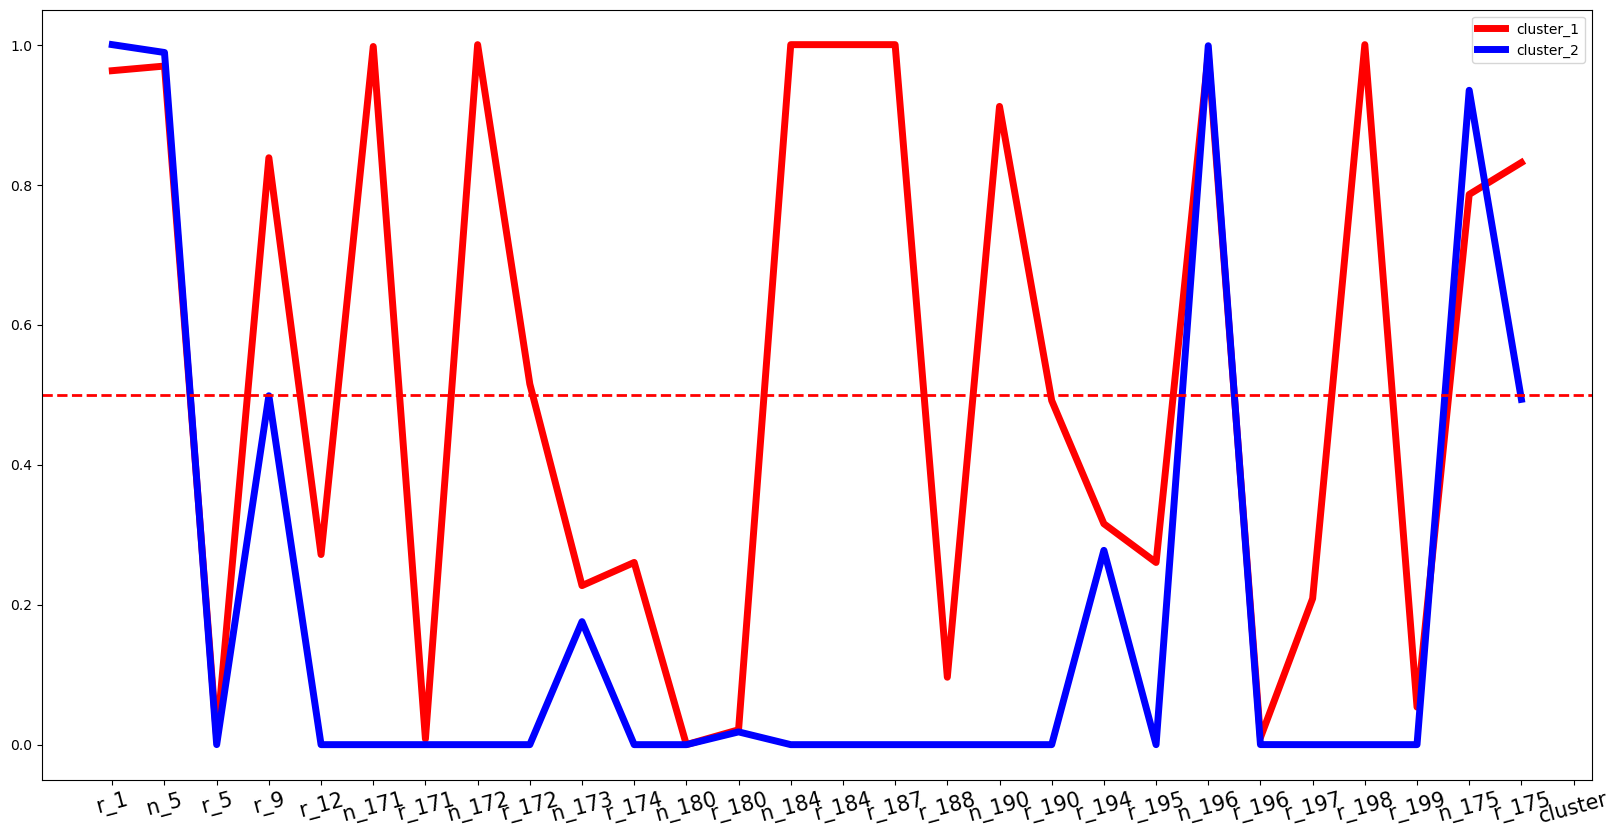

In [109]:
plt.figure(figsize=(20,10))

plt.plot(range(0,28),best_kmeans.cluster_centers_[0],linewidth=5, color='red', label='cluster_1')
plt.plot(range(0,28),best_kmeans.cluster_centers_[1], linewidth=5, color='blue', label='cluster_2')
plt.legend()
plt.axhline(0.5, color='red', linestyle='--', linewidth=2)
plt.xticks(np.arange(0,29),label_1.columns,rotation=15 ,fontsize=15)
plt.show()

In [48]:
len(label_1.columns)

28

In [57]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(label_1)
label_1_pca = pca.transform(label_1)

In [58]:
# dim reduction with tsne
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method. not be used as preprocessing step of supervised learning
label_1_tsne = tsne.fit_transform(label_1)

Text(0, 0.5, 'Second principal component')

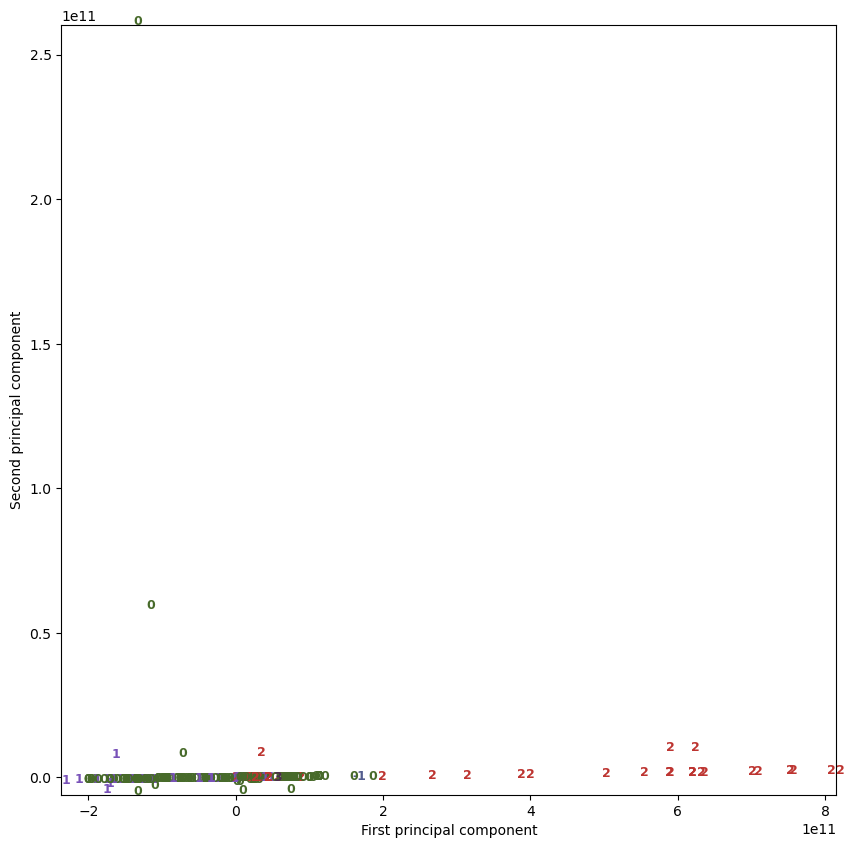

In [117]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_pca[:, 0].min(), label_1_pca[:, 0].max())
plt.ylim(label_1_pca[:, 1].min(), label_1_pca[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_pca[i, 0], label_1_pca[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#중복되는 경우 많음. 난잡하게 섞여있다.

Text(0, 0.5, 'Second principal component')

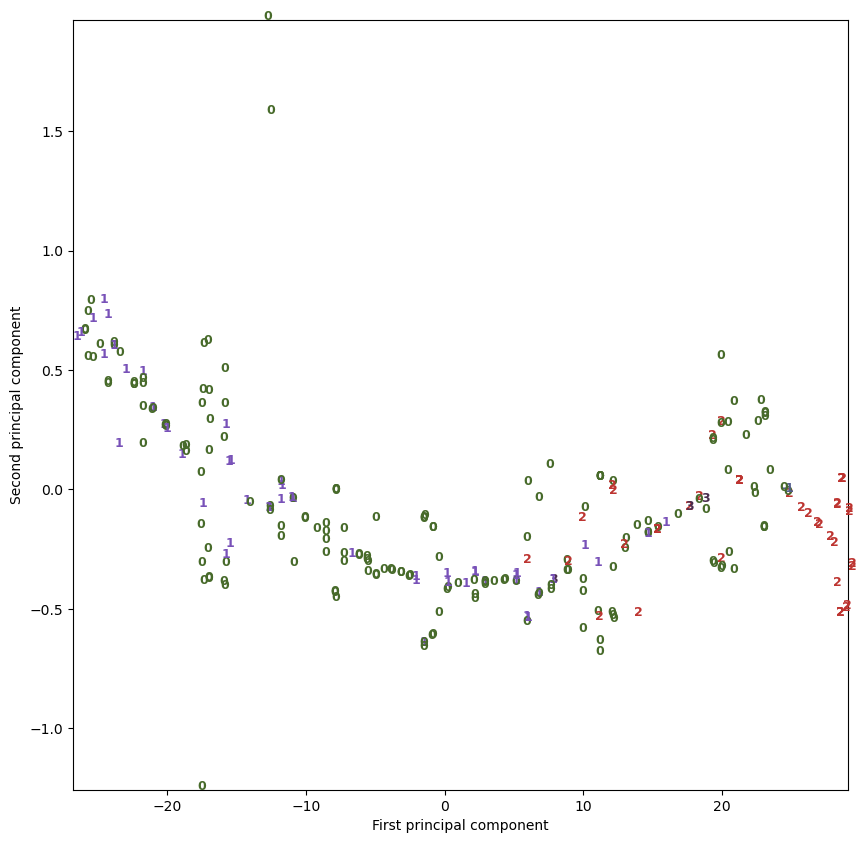

In [118]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(label_1_tsne[:, 0].min(), label_1_tsne[:, 0].max())
plt.ylim(label_1_tsne[:, 1].min(), label_1_tsne[:, 1].max())
for i in range(len(label_1)):
    # actually plot the digits as text instead of using scatter
    plt.text(label_1_tsne[i, 0], label_1_tsne[i, 1], str(list(label_1['cluster'])[i]),
             color = colors[list(label_1['cluster'])[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#상대적으로 잘 뭉쳐져있다! -> 시각화하는데 잘 사용됨.